<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/02.%20Pre-Processing%20%26%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()


# Importing libraries

In [43]:
from getpass import getpass
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pyedflib


# Data load 

* this function convert an edf file into dataframe using mne library

In [44]:
def tuh_data_load(data_file, selected_channels=[]):

    try:
        f = pyedflib.EdfReader(data_file)
        channel_names = f.getSignalLabels()
        channel_freq = f.getSampleFrequencies()
        
        if len(selected_channels) == 0:
            selected_channels = channel_names

        sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
        for i, channel in enumerate(selected_channels):
            try:
              sigbufs[:, i] = f.readSignal(channel_names.index(channel))
            
            except:
              ValueError
             
              sigbufs[:, i] = np.nan


        df = pd.DataFrame(sigbufs, columns = selected_channels)#.astype('float32')
        
        index_increase = np.linspace(0,
                                      len(df)/channel_freq[0],
                                      len(df), endpoint=False)

       

        seconds = index_increase
        
        df['Time'] = seconds
        df = df.set_index('Time')
        df.columns.name = 'Channel'
        
       
        return df, channel_freq[0]

    except:
        OSError
        return pd.DataFrame(), None


* test on an epileptic and non-epileptic file

In [48]:
not_epileptic_file = "no_epil_file.edf"     #path of an edf file for not epileptic patient
epileptic_file = "epil_file.edf"          #path of an edf file for  epileptic patient
  
not_epil_df, not_epil_freq = tuh_data_load(not_epileptic_file )
epil_df, epil_freq = tuh_data_load(epileptic_file )

epil_df

Channel,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG 27-REF,EEG 28-REF,EEG 29-REF,EEG 30-REF,EEG T1-REF,EEG T2-REF,PHOTIC-REF,IBI,BURSTS,SUPPR
Time,,,,,,,,,,,,,,,,,,,,,
0.000,13.583812,9.158766,-7.168125,-19.069971,-35.854626,-10.982820,-11.593171,-8.083652,-3.048255,-1.827553,...,14.499338,-5.031896,-4.879309,-1.827553,-17.544094,-10.372468,0.0,NaN,NaN,NaN
0.004,18.924384,12.668285,-4.574133,-0.149088,-35.244275,-8.846591,-13.119048,-7.168125,-5.031896,-4.268958,...,17.398506,-12.050934,-7.320713,-4.268958,-12.508697,-8.846591,0.0,NaN,NaN,NaN
0.008,19.992498,16.177804,-2.895668,-8.388827,-36.007214,-11.898346,-14.187163,-9.151766,-6.252599,-4.268958,...,13.278636,1.529378,-7.320713,2.444904,-14.034575,-3.506019,0.0,NaN,NaN,NaN
0.012,18.314033,11.142407,-3.506019,-3.048255,-37.075328,-19.375147,-16.475979,-12.813873,-10.525056,-8.083652,...,5.649248,11.752758,0.613851,3.207843,-15.713040,-8.694003,0.0,NaN,NaN,NaN
0.016,17.703681,12.057934,-3.658607,0.461263,-37.685679,-5.947423,-18.459620,-10.219881,-13.271636,-8.999179,...,12.057934,6.107011,1.224202,6.259599,-19.680322,-11.287995,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324.980,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.0,NaN,NaN,NaN
1324.984,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.0,NaN,NaN,NaN
1324.988,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.0,NaN,NaN,NaN


# Select useful channels

* delete the electrodes that cannot be used in the Electroencephalogram

In [49]:
def final_df(data):
    # rename columns and drop 'eeg' ,'ref' et 'le'
    new_column_list = [x.replace('-REF', '').replace('-LE', '').replace('EEG ', '') for x in data]
    d={}
    for i in range(len(new_column_list)):
        d[data.columns[i]]=new_column_list[i]
    data.rename(columns = d, inplace = True)
    #list of chhannels to select 
    electrode_list=['FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T3','T4','T5','T6','A1','A2','FZ','CZ','PZ','T1','T2']
    i=0
    dt=pd.DataFrame()
    for x in electrode_list:
        if(x in data.columns):
            dt[x]=data[x]
        else:
            dt[x]=pd.Series(data.mean(axis=1), data.index)
    return dt

* test on an epileptic and non-epileptic file

In [50]:
not_epil_df=final_df(not_epil_df)

In [51]:
epil_df=final_df(epil_df)
epil_df

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,T4,T5,T6,A1,A2,FZ,CZ,PZ,T1,T2
Time,,,,,,,,,,,,,,,,,,,,,
0.000,13.583812,9.158766,-7.168125,-19.069971,-35.854626,-10.982820,-11.593171,-8.083652,-3.048255,-1.827553,...,-11.745758,-15.102689,-8.083652,-6.557774,-6.100011,6.259599,-2.895668,-9.609530,-17.544094,-10.372468
0.004,18.924384,12.668285,-4.574133,-0.149088,-35.244275,-8.846591,-13.119048,-7.168125,-5.031896,-4.268958,...,-15.255277,-15.713040,-2.895668,-8.083652,-22.884666,7.632889,-2.895668,-11.745758,-12.508697,-8.846591
0.008,19.992498,16.177804,-2.895668,-8.388827,-36.007214,-11.898346,-14.187163,-9.151766,-6.252599,-4.268958,...,-5.794835,-16.933743,-5.947423,-4.268958,-3.506019,8.395827,-3.658607,-12.966461,-14.034575,-3.506019
0.012,18.314033,11.142407,-3.506019,-3.048255,-37.075328,-19.375147,-16.475979,-12.813873,-10.525056,-8.083652,...,-20.748437,-19.375147,-16.933743,-7.473301,0.613851,6.869950,-5.184484,-15.865628,-15.713040,-8.694003
0.016,17.703681,12.057934,-3.658607,0.461263,-37.685679,-5.947423,-18.459620,-10.219881,-13.271636,-8.999179,...,-13.424224,-20.595849,-7.931064,-11.593171,-1.827553,7.938064,-4.421545,-16.933743,-19.680322,-11.287995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324.980,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500
1324.984,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500
1324.988,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500


## Plot the signal

In [52]:
import mne

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw



Creating RawArray with float64 data, n_channels=23, n_times=317000
    Range : 0 ... 316999 =      0.000 ...  1267.996 secs
Ready.
Creating RawArray with float64 data, n_channels=23, n_times=331250
    Range : 0 ... 331249 =      0.000 ...  1324.996 secs
Ready.


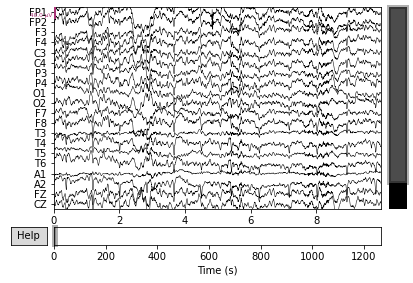

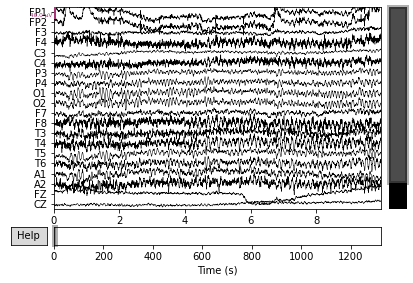

In [53]:
signal_not_epil = mne_object(not_epil_df,not_epil_freq)
signal_epil = mne_object(epil_df,epil_freq)
plot = signal_not_epil.plot()
plot = signal_epil.plot()

## band-pass filter [0.1-80] function

* apply a band pass filter [0.1-0.80]  to filter the singals

In [54]:
def filter_signal(signal):
    df=pd.DataFrame()
    sfreq = signal.info['sfreq'] #fréquence d'echntillonage
    l_freq = 0.1
    h_freq =80
    method = 'fir'
    fir_design = 'firwin2'

    filt_data = signal.filter(l_freq, h_freq,
                         method=method, 
                         fir_design=fir_design)
    df=filt_data.to_data_frame() #convert to filtred signal into dataframe
    df['time']=df['time']/1000
    df=df.set_index('time')

    return df



In [55]:
epil_df=filter_signal(signal_epil)
epil_not_df=filter_signal(signal_not_epil)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 16501 samples (66.004 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length

# WELCH method

In [16]:
from scipy.signal import welch
sample_rate = 173.61 # in hz

##[8,12],'power_alpha']
low = 8

nperseg = (2 / low)*sample_rate   ## window size
electrode=pd.DataFrame(epil_df.iloc[:,1] )    ## extraire les valeur du 1er éléctrode

# Compute the periodogram (Welch)
freqs, psd = welch(electrode, 
                   sample_rate, 
                   nperseg=nperseg,
                   scaling='density', 
                   axis=0)

psd = pd.DataFrame(psd, index = freqs, columns = electrode.columns)

print(color.BOLD+'Welch Output'+color.END)
psd.index.name = 'Hz'
psd.columns = ['Power']
display(psd)

Welch Output


,Power
Hz,
0.000000,4.913115e-01
4.037442,3.124921e+00
8.074884,2.072728e+00
12.112326,7.428849e-01
16.149767,4.566448e-01
20.187209,3.335351e-01
24.224651,2.989534e-01
28.262093,2.887359e-01
32.299535,3.017222e-01


* get the mean of each channel over all frequencies in the band

In [17]:
import numpy as np

# specify the higest frequency your interested in
high = 12

# Find closest indices of band in frequency vector
idx_min = np.argmax(np.round(freqs) > low) - 1
idx_max = np.argmax(np.round(freqs) > high)

# select frequencies of interest
psd = psd.iloc[idx_min:idx_max,:]


psd = psd.mean()

print(color.BOLD+'\nMean Frequency Band'+color.END)
display(psd)


Mean Frequency Band


Power    1.407806
dtype: float64

In [18]:
from scipy.signal import welch
import numpy as np

def bandpower(data, sf, band, output = False):
    band = np.asarray(band)
    low, high = band

    freqs, psd = welch(data, 
                       sf, 
                       nperseg=(2 / low)*sf,
                       scaling='density', 
                       axis=0)
    
    psd = pd.DataFrame(psd, index = freqs, columns = data.columns)
    
    if output:
        print(color.BOLD+'Welch Output'+color.END)
        psd.index.name = 'Hz'
        psd.columns = ['Power']
        display(psd)
    
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)
    
    psd = psd.iloc[idx_min:idx_max,:]
    
    psd = psd.mean()
    
    if output:
        print(color.BOLD+'\nMean Frequency Band'+color.END)
        display(psd)
    
    return psd



In [19]:
electrode_power = bandpower(electrode, sample_rate, [8,12], output=False)
electrode_power

FP2    1.407806
dtype: float64

### for multiple band frequencies in one electrode

In [20]:
def power_measures(data, output=False):
    bandpasses = [[[0.1,4],'power_delta'],
                  [[4,8],'power_theta'],
                  [[8,12],'power_alpha'],
                  [[12,30],'power_beta'],
                  [[30,70],'power_gamma']
                 ]
    
    welch_df = pd.DataFrame()
    for bandpass, freq_name in bandpasses:
        bandpass_data = bandpower(data, sample_rate, bandpass)
        bandpass_data.index = [freq_name]
        
        if welch_df.empty:
            welch_df = bandpass_data

        else:
            welch_df = pd.concat([welch_df, bandpass_data])
        
    welch_df = welch_df.T
    
    if output:
        display(welch_df)
    
    return welch_df



In [21]:
electrode_epil=pd.DataFrame(epil_df.iloc[:,1] )    ## extraire les valeur du 1er éléctrode
electrode_not_epil =pd.DataFrame(not_epil_df.iloc[:,1] )    ## extraire les valeur du 1er éléctrode

print(color.BOLD+color.UNDERLINE+'Epileptic Mean Power'+color.END)
epil_power = power_measures(electrode_epil, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Not Eplieptic Mean Power'+color.END)
not_epil_power = power_measures(electrode_not_epil, output=True)

Epileptic Mean Power


power_delta    13.302268
power_theta     2.965159
power_alpha     1.407806
power_beta      0.539424
power_gamma     0.291953
dtype: float64


Not Eplieptic Mean Power


power_delta    74.279917
power_theta     7.842345
power_alpha     2.774556
power_beta      0.693423
power_gamma     0.231276
dtype: float64

### for multiple band frequencies for all electrodes

In [56]:

def power_measure_channels(data, freq, output=False):

  welch_df = pd.DataFrame()
  for channel_name in data:
    channel_df = pd.DataFrame(power_measures(pd.DataFrame(data[channel_name])))
    channel_df['channel'] = channel_name
    channel_df.index.name = 'feature'
    channel_df = channel_df.set_index('channel', append=True)
    channel_df = channel_df.swaplevel()

    if welch_df.empty:
        welch_df = channel_df
    else:
        welch_df = pd.concat([welch_df, channel_df])

  welch_df = welch_df.T

  if output:
    display(welch_df.head())
    
  return welch_df



In [23]:
print(color.BOLD+color.UNDERLINE+'Power mesure in all elctrodes for an Epileptic Person'+color.END)
example_power_measure_epil = power_measure_channels(epil_df, 
                                               epil_freq, 
                                               output=True)

print(color.BOLD+color.UNDERLINE+'Power mesure in all elctrodes for not Epileptic Person'+color.END)

example_power_measure_not_epil = power_measure_channels(not_epil_df, 
                                               not_epil_freq, 
                                               output=True)

Power mesure in all elctrodes for an Epileptic Person


channel         FP1                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0         10.646387    2.447282    1.179599   0.424765    0.214531   

channel         FP2                                                 ...  \
feature power_delta power_theta power_alpha power_beta power_gamma  ...   
0         13.302268    2.965159    1.407806   0.539424    0.291953  ...   

channel          T1                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0          5.692492    6.734225    3.295546   0.973262    0.504061   

channel          T2                                                 
feature power_delta power_theta power_alpha power_beta power_gamma  
0          6.208744    7.882848    3.744365   1.215561    0.700891  

[1 rows x 115 columns]

Power mesure in all elctrodes for not Epileptic Person


channel         FP1                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0         72.845982    7.030387    2.403686   0.595339    0.202773   

channel         FP2                                                 ...  \
feature power_delta power_theta power_alpha power_beta power_gamma  ...   
0         74.279917    7.842345    2.774556   0.693423    0.231276  ...   

channel          T1                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0         10.675151    2.169633    0.789675   0.216427    0.106243   

channel          T2                                                 
feature power_delta power_theta power_alpha power_beta power_gamma  
0         22.672477      7.1628    2.862394   0.705731    0.222558  

[1 rows x 115 columns]

# Wavlets

In [24]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [25]:
def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

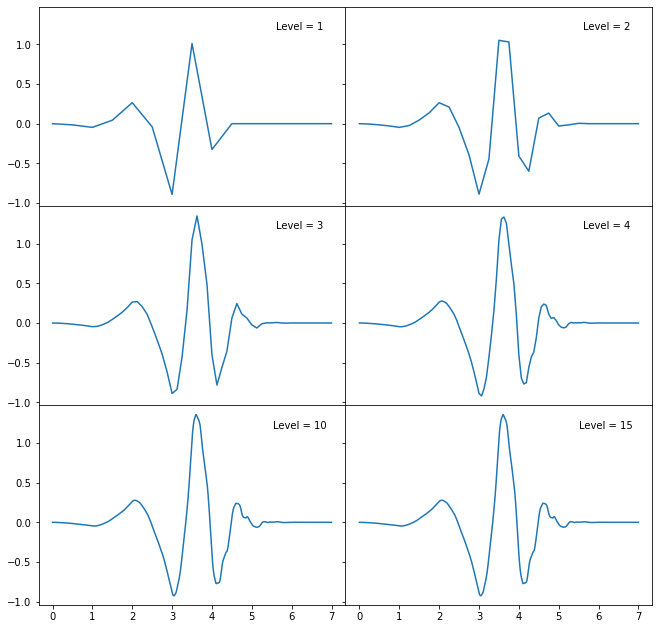

In [26]:
from pywt import Wavelet
plot_wavelet(Wavelet('db4'))



- D1: 43.40 - 86.805 (Gamma)

- D2: 21.7 - 43.40 (Beta/Gamma)

- D3: 10.85 - 21.7 (Beta)

- D4: 5.43 - 10.85 (Alpha)

- D5: 2.71 - 5.43 (Theta)

- D6: 1.36 - 2.71 (Delta)

- A6: >1.36 (Delta/DC)

In [27]:
from pywt import wavedec

# number of levels we are interested in
level = 6

electrode_epil=pd.DataFrame(epil_df.iloc[:,1] )
# transpose the data because its a time-series package
data_t = electrode_epil.transpose()

# get the wavelet coefficients at each level in a list
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

print(type(coeffs_list))
print(color.BOLD+color.UNDERLINE+'\nExample first array'+color.END)
coeffs_list

<class 'list'>

Example first array


[array([[ 3.21335190e+01,  3.19812161e+01,  3.26682248e+01, ...,
         -1.46860846e+00, -5.39916945e-01,  6.34922491e-03]]),
 array([[ 0.09912495,  0.34711356,  1.87427748, ..., -0.03059844,
         -0.06031089,  0.02280204]]),
 array([[-0.1452416 , -0.47977913, -0.29927464, ..., -0.01321387,
          0.00789059,  0.00226013]]),
 array([[ 0.22640875,  0.63294469, -2.15013082, ..., -0.00407847,
         -0.00840616,  0.00319297]]),
 array([[ 2.62930950e-01,  9.65956820e-01,  2.54315691e-01, ...,
         -4.79296941e-03,  1.62652746e-03,  2.10748925e-04]]),
 array([[-1.72026958e+00, -5.56581191e+00,  4.44506059e-01, ...,
         -1.46992258e-04, -2.53394663e-04,  3.86391190e-04]]),
 array([[-2.17717974e-01,  2.56815183e-01,  5.74493248e-01, ...,
          5.24557261e-05,  4.02616735e-04,  6.10611767e-04]])]

* As we increase the level the number of intervals decrease ==> we will have less rows 

In [28]:
# liste des coefficiet

names=['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']
names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

* Now lets turn the arrays into dataframes and use these names as the header.

In [29]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]]
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

,A6,D6,D5,D4,D3,D2,D1
0,32.133519,0.099125,-0.145242,0.226409,0.262931,-1.720270,-0.217718
1,31.981216,0.347114,-0.479779,0.632945,0.965957,-5.565812,0.256815
2,32.668225,1.874277,-0.299275,-2.150131,0.254316,0.444506,0.574493
3,30.365001,-29.890076,-3.464622,-7.521138,2.769085,3.085477,-0.975510
4,51.709702,227.119437,12.533938,-8.795706,-2.212021,1.551914,-1.242477


In [30]:
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets

,D6,D5,D4,D3,D2,D1
0,0.099125,-0.145242,0.226409,0.262931,-1.720270,-0.217718
1,0.347114,-0.479779,0.632945,0.965957,-5.565812,0.256815
2,1.874277,-0.299275,-2.150131,0.254316,0.444506,0.574493
3,-29.890076,-3.464622,-7.521138,2.769085,3.085477,-0.975510
4,227.119437,12.533938,-8.795706,-2.212021,1.551914,-1.242477
...,...,...,...,...,...,...
165623,NaN,NaN,NaN,NaN,NaN,-0.000652
165624,NaN,NaN,NaN,NaN,NaN,-0.000287
165625,NaN,NaN,NaN,NaN,NaN,0.000052
165626,NaN,NaN,NaN,NaN,NaN,0.000403


In [31]:
def wavelet_decompose(data, output=False):
    
    # decompose data into coefficients
    level = 6

    # return the frequencies
    frequencies = np.array(250*level)
    j = [1<<exponent for exponent in range(level)]
    frequencies = frequencies/j
    
    # transpose the data
    data_t = data.transpose()
    
    # get the wavelet coefficients at each level in a list
    coeffs_list = wavedec(data_t.values, wavelet='db4', level=level, mode='per')

    # make a list of the component names (later column rows)
    nums = list(range(1,level+1))
    names=[]
    for num in nums:
        names.append('D' + str(num))
    names.append('A' + str(nums[-1]))
    
    # reverse the names so it counts down
    names = names[::-1] 
    
    # make an empy dataframe
    wavelets = pd.DataFrame()
    
    # for each array in the list of arrays
    for i, array in enumerate(coeffs_list):
        # turn into a dataframe and transpose
        level_df = pd.DataFrame(array).T
        # name the column the appropriate level name
        level_df.columns = [names[i]]
        # if the wavelets df is empty...
        if wavelets.empty:
            # ... make the first level df the wavelets df
            wavelets = level_df
        # ..otherwise...
        else:
            # ... add the next levels df to another column
            wavelets = pd.concat([wavelets,level_df], axis=1)
    
    # remove the AN levels
    regex = re.compile('D')
    bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
    decom_wavelets = wavelets.drop(bad_items, axis=1)
    
    if output:
        display(decom_wavelets.head())
    
    return decom_wavelets, frequencies

print(color.BOLD+color.UNDERLINE+'not_epeliptic Wavelets'+color.END)
not_epeliptic_wavelets, frequencies = wavelet_decompose(electrode_not_epil, output=True)
print()
print(color.BOLD+color.UNDERLINE+'epeliptic Wavelets'+color.END)
epeliptic_wavelets, frequencies = wavelet_decompose(electrode_epil, output=True)

not_epeliptic Wavelets


,D6,D5,D4,D3,D2,D1
0,70.075421,25.514967,4.860547,-1.630531,-4.163982,0.088571
1,-42.836711,36.462341,-17.702005,1.370009,1.789162,-1.734945
2,-6.979613,30.453333,24.922690,-4.562420,-3.359989,1.509464
3,49.579600,37.577890,9.389767,-3.652726,1.001400,-0.470197
4,-148.061260,-11.174677,-2.587113,1.609553,1.446661,-2.183062



epeliptic Wavelets


,D6,D5,D4,D3,D2,D1
0,-13.374932,5.061590,-3.699723,-1.244568,-3.889306,-2.260831
1,239.006434,20.618613,-0.962037,-6.989897,-2.057746,0.252420
2,-79.000783,1.362518,4.550956,4.991810,-1.114137,3.018524
3,152.263758,-46.274783,-17.326052,-5.932642,-1.285782,-3.575590
4,-123.187967,21.905237,1.771868,1.650779,1.866665,0.939361


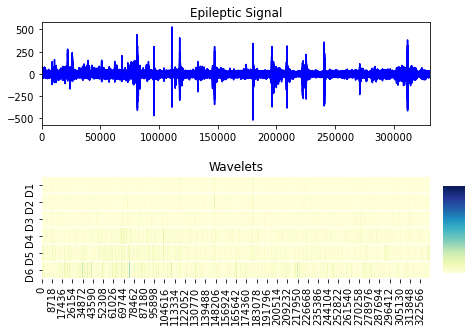

[1500.     750.     375.     187.5     93.75    46.875]


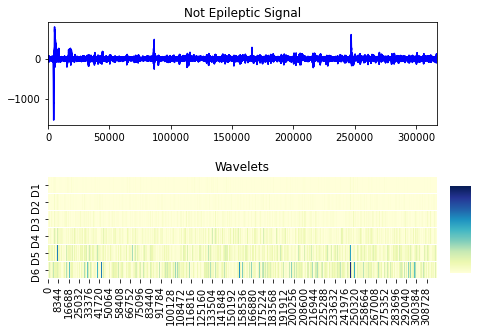

[1500.     750.     375.     187.5     93.75    46.875]


In [32]:
import seaborn as sns

def plot_dwt_scalogram(signal, wt_data, frequencies, interpolation, class_name):
  
  cmap = plt.cm.cool
  x = range(len(signal))
  
  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)
  
  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  exponent_list = [2<<exponent for exponent in range(wt_data.shape[1]+1)]
  wt_data_ = wt_data.copy()
  for i, decom in enumerate(wt_data.sort_index(1).columns):
    exponent_data = wt_data_[decom].dropna().repeat(exponent_list[i]).reset_index(drop=True)
    if i == 0:
      plot_data = pd.DataFrame(exponent_data.abs(), 
                               columns =[decom])
    else:
      plot_data = pd.concat([plot_data, pd.DataFrame(exponent_data.abs(), columns =[decom])], axis=1)
  
  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(plot_data.T, ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax, 
              cbar_kws={"ticks":[]}
              )
  
  plt.show()
  print(frequencies)

plot_dwt_scalogram(epil_df, 
               epeliptic_wavelets, 
               frequencies, None, 'Epileptic')

plot_dwt_scalogram(not_epil_df, 
               not_epeliptic_wavelets, 
               frequencies, None, 'Not Epileptic')

### for multiple electrodes

In [33]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]  

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets



In [34]:
example_wavelets = wavelet_decompose_channels(epil_df, level=5, output=True)

channel        A1                                                  A2  \
level          D1        D2        D3         D4         D5        D1   
sample                                                                  
0       -1.255645  0.638846 -2.557617   0.039640   0.245722  0.888964   
1       -3.452454  1.784436 -7.996391   0.567921   0.668673  1.970348   
2        1.524050 -0.175779  4.268630   2.074040  -3.870176 -1.636651   
3       -2.452284  2.798963  8.778317  10.518068   8.888078  3.468684   
4       -1.496577 -1.692909 -8.469941   0.685418 -21.198736 -1.602927   

channel                                             ...        T5            \
level          D2         D3         D4         D5  ...        D1        D2   
sample                                              ...                       
0       -0.946145  -0.610981   0.068708  -0.111919  ... -0.484347  1.317532   
1       -3.023056  -1.741779   0.456502  -0.446874  ... -1.138840  3.903321   
2        1.459124   3.733998  -0.894071  -2.587533  ...  1.922849 -2.061449   
3        1.174259   9.996175  -1.277539  -0.006296  ...  1.138762  2.864977   
4        4.477497 -11.048205 -11.608568 -20.720456  ...  0.130398 -3.402044   

channel                                       T6                       \
level          D3        D4         D5        D1        D2         D3   
sample                                                                  
0       -2.469488  0.038957   0.365371 -0.428519  0.443594  -2.814899   
1       -7.917276  0.303038   0.982592 -0.691180  0.869798  -9.060334   
2        1.093942 -0.242188  -4.502989  0.318818 -4.562612   1.405594   
3        7.863659  5.923333   6.250123  2.869294  0.140347  15.087291   
4       -0.918945 -0.911383 -17.116246 -0.259303  0.771233  -5.660711   

channel                        
level           D4         D5  
sample                         
0         0.279904   0.309411  
1         1.045889   0.707774  
2        -3.437489  -6.179015  
3        -4.422868   5.546239  
4       -19.064290 -18.879712  

[5 rows x 115 columns]

## LOG_SUM

In [35]:
def minus_small(data):    
  # find the smallest value for each data column (channel)...
  min_val = data.min()
  # ...and subtract it from all the data in the column and add one
  data = data.subtract(min_val).add(1)

  return data

def log_sum(data, output=False):
    absolute_sums = data.sum()
    # ...and subtract it from all the data in the column and add one
    absolute_sums_minus = minus_small(absolute_sums)
    # find the log of each elecment (datapoint)
    absolute_sums_log = absolute_sums_minus.apply(np.log)
    absolute_sums_log.index += '_LSWT'
    
    if output:
        display(absolute_sums_log)
    
    return absolute_sums_log
    


In [36]:
print(color.BOLD+color.UNDERLINE+'Not Epileptic Log Sum Wavelets'+color.END)
not_epileptic_LSWT = log_sum(not_epeliptic_wavelets ,output=True)
print()
print(color.BOLD+color.UNDERLINE+'Epileptic Log Sum Wavelets'+color.END)
epileptic_LSWT = log_sum(epeliptic_wavelets, output=True)

Not Epileptic Log Sum Wavelets


D6_LSWT    8.041888
D5_LSWT    0.000000
D4_LSWT    7.763354
D3_LSWT    7.793098
D2_LSWT    4.085934
D1_LSWT    7.680418
dtype: float64


Epileptic Log Sum Wavelets


D6_LSWT    8.042376
D5_LSWT    0.000000
D4_LSWT    8.057766
D3_LSWT    8.426329
D2_LSWT    8.223858
D1_LSWT    8.014600
dtype: float64

### for multiple electrodes

In [37]:
def reformat(data, feature_name):
  data.index = [feature_name+level for level in data.index]
  data.index.name = 'feature'
  data = pd.DataFrame(data.unstack()).T

  return data

def log_sum_channels(data, output=False):
  absolute_sums = data.sum()
  # make the columns channels
  absolute_sums = absolute_sums.unstack('channel')
  # for each channel apply the minus small function
  absolute_sums_minus = absolute_sums.apply(minus_small)
  # find the log of each channel
  absolute_sums_log = absolute_sums_minus.apply(np.log)
  # reformat the df for later combination with other features
  absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

  if output:
    display(absolute_sums_log.head())

  return absolute_sums_log
    


In [38]:
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)

channel        A1                                              A2            \
feature   LSWT_D1   LSWT_D2   LSWT_D3   LSWT_D4 LSWT_D5   LSWT_D1   LSWT_D2   
0        7.371791  6.540583  5.316952  7.924616     0.0  7.899647  7.754802   

channel                              ...        T5                             \
feature   LSWT_D3 LSWT_D4   LSWT_D5  ...   LSWT_D1   LSWT_D2 LSWT_D3  LSWT_D4   
0        7.219601     0.0  7.107176  ...  7.539652  7.143265     0.0  8.07682   

channel                T6                                        
feature LSWT_D5   LSWT_D1   LSWT_D2   LSWT_D3 LSWT_D4   LSWT_D5  
0        5.3001  7.609349  7.984771  7.567408     0.0  7.316342  

[1 rows x 115 columns]

## Average power 

In [39]:
def ave(data, output=False):
    # get the mean
    mean_data = data.mean()
    
    mean_data.index += '_mean'
    
    if output:
        display(mean_data)
    
    return mean_data
    
print(color.BOLD+color.UNDERLINE+'Not Epileptic Mean Wavelets'+color.END)
not_epileptic_mean = ave(not_epeliptic_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Epileptic Mean Wavelets'+color.END)
epileptic_mean = ave(epeliptic_wavelets, output=True)

Not Epileptic Mean Wavelets


D6_mean    0.233966
D5_mean   -0.196670
D4_mean    0.020359
D3_mean    0.011972
D2_mean   -0.023847
D1_mean    0.001364
dtype: float64


Epileptic Mean Wavelets


D6_mean    0.016568
D5_mean   -0.292044
D4_mean    0.006472
D3_mean    0.037227
D2_mean    0.008509
D1_mean    0.000003
dtype: float64

In [40]:
def ave_channels(data, output=False):
  # get the mean
  mean_data = data.mean()

  mean_data = mean_data.unstack('channel')

  mean_data = reformat(mean_data, 'Mean_')

  if output:
      display(mean_data.head())

  return mean_data



In [41]:
example_wavelet_mean = ave_channels(example_wavelets, output=True)

channel        A1                                                A2            \
feature   Mean_D1   Mean_D2   Mean_D3   Mean_D4   Mean_D5   Mean_D1   Mean_D2   
0        0.010567 -0.000547 -0.024702  0.197835 -0.137847  0.008379  0.007977   

channel                                ...        T5                     \
feature   Mean_D3   Mean_D4   Mean_D5  ...   Mean_D1  Mean_D2   Mean_D3   
0       -0.030735 -0.193225 -0.150855  ...  0.007914  0.00096 -0.059144   

channel                            T6                                          
feature   Mean_D4   Mean_D5   Mean_D1   Mean_D2   Mean_D3   Mean_D4   Mean_D5  
0        0.192428 -0.197887 -0.004688  0.012816 -0.022748 -0.232111 -0.173777  

[1 rows x 115 columns]

## Mean of the absolute values 

In [42]:
def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()
    
    mean_abs_data.index += '_mean_abs'
    
    if output:
        display(mean_abs_data)
    
    return mean_abs_data
    
print(color.BOLD+color.UNDERLINE+'Not Epileptic Mean Absolute Wavelets'+color.END)
not_epileptic_mean_abs = mean_abs(not_epeliptic_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Epilepic Mean Absolute Wavelets'+color.END)
epileptic_mean_abs = mean_abs(epeliptic_wavelets, output=True)

Not Epileptic Mean Absolute Wavelets


D6_mean_abs    34.560196
D5_mean_abs    23.116242
D4_mean_abs    13.687863
D3_mean_abs     5.162357
D2_mean_abs     2.181983
D1_mean_abs     1.211388
dtype: float64


Epilepic Mean Absolute Wavelets


D6_mean_abs    15.790103
D5_mean_abs    11.710453
D4_mean_abs    10.149250
D3_mean_abs     4.918052
D2_mean_abs     3.132306
D1_mean_abs     1.756261
dtype: float64

In [43]:
def mean_abs_channels(data, output=False):
  # get the mean of the absolute values
  mean_abs_data = data.abs().mean()

  mean_abs_data = mean_abs_data.unstack('channel')

  mean_abs_data = reformat(mean_abs_data, 'Mean_Abs_')

  if output:
    display(mean_abs_data.head())

  return mean_abs_data
    



In [44]:
example_mean_abs = mean_abs_channels(example_wavelets, output=True)

channel          A1                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          2.837843    5.295968   16.310468   15.324105   10.923697   

channel          A2                                                  ...  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  ...   
0          3.440201    5.990922   19.184564   17.283889    9.671851  ...   

channel          T5                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0           1.96751    4.597595   15.666262   14.318773    7.386922   

channel          T6                                                  
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  
0          2.258469    5.304363   17.524254   15.574745    8.005719  

[1 rows x 115 columns]

## Standard deviation

In [45]:
def coeff_std(data, output=False):
    # get the standard deviation of the coeficients
    std_data = data.std()
    
    std_data.index += '_std'
    
    if output:
        display(std_data)
    
    return std_data
    
print(color.BOLD+color.UNDERLINE+'Not Epileptic Standard Deviation Wavelets'+color.END)
not_epileptic_std = coeff_std(not_epeliptic_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Epileptic Standard Deviation Wavelets'+color.END)
epileptic_std = coeff_std(epeliptic_wavelets, output=True)

Not Epileptic Standard Deviation Wavelets


D6_std    49.152355
D5_std    30.032515
D4_std    18.027257
D3_std     7.106819
D2_std     3.166949
D1_std     2.211806
dtype: float64


Epileptic Standard Deviation Wavelets


D6_std    26.245655
D5_std    16.144074
D4_std    13.112844
D3_std     6.601475
D2_std     5.143803
D1_std     3.196629
dtype: float64

In [46]:
def coeff_std_channels(data, output=False):
  # get the standard deviation of the coeficients
  std_data = data.std()

  std_data = std_data.unstack('channel')

  std_data = reformat(std_data, 'STD_')

  if output:
    display(std_data.head())

  return std_data

In [47]:
example_std = coeff_std_channels(example_wavelets, output=True)

channel        A1                                                 A2  \
feature    STD_D1   STD_D2     STD_D3     STD_D4     STD_D5   STD_D1   
0        5.083969  6.99035  21.226784  20.145526  14.907503  5.81142   

channel                                             ...        T5            \
feature    STD_D2     STD_D3     STD_D4     STD_D5  ...    STD_D1    STD_D2   
0        7.879351  24.787765  22.803328  13.205644  ...  3.495522  5.984711   

channel                                       T6                       \
feature     STD_D3     STD_D4    STD_D5   STD_D1    STD_D2     STD_D3   
0        20.310257  19.062508  9.723957  4.04285  6.869071  22.456377   

channel                        
feature     STD_D4     STD_D5  
0        20.664713  11.321437  

[1 rows x 115 columns]

## RATIO

In [48]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index += '_Ratio'
    
    if output:
        display(ratio_data)
    
    return ratio_data


print(color.BOLD+color.UNDERLINE+'Not Epileptic Ratio Wavelets'+color.END)
not_epileptic_ratio = ratio(not_epeliptic_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'pileptic Ratio Wavelets'+color.END)
epileptic_ratio = ratio(epeliptic_wavelets, output=True)

Not Epileptic Ratio Wavelets


<ipython-input-48-a649d639be7a>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ratio_data=pd.Series(index=data.index)


D6_Ratio    1.495061
D5_Ratio    0.958225
D4_Ratio    0.968072
D3_Ratio    0.650587
D2_Ratio    0.684678
D1_Ratio    0.555178
dtype: float64


pileptic Ratio Wavelets


D6_Ratio    1.348377
D5_Ratio    0.902910
D4_Ratio    1.220705
D3_Ratio    0.740584
D2_Ratio    0.938615
D1_Ratio    0.560693
dtype: float64

In [49]:
def ratio_channels(epoch_data):
    
  decimation_levels = list(epoch_data.index)

  ratio_data=pd.Series()
  for level_no in range(0, len(decimation_levels)):
    # for the first decimation
    if level_no == 0:
      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/epoch_data.loc[decimation_levels[level_no+1]]
    #for the last decimation
    elif level_no == len(decimation_levels)-1:
      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/epoch_data.loc[decimation_levels[level_no-1]]
    else:
      before = epoch_data.loc[decimation_levels[level_no-1]]
      after = epoch_data.loc[decimation_levels[level_no+1]]
      mean_data = (before+after)/2

      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/mean_data

  #name the index column
  ratio_data.index.name = 'features'

  return ratio_data

# get the ratio
example_ratio_data = example_wavelets.mean().unstack('channel').apply(ratio_channels)
example_ratio_data = reformat(example_ratio_data, 'Ratio_Mean_')
display(example_ratio_data.head())

<ipython-input-49-68a16c6e6005>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ratio_data=pd.Series()


channel            A1                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0          -19.333812      0.077337     -0.250419     -2.434149     -0.696779   

channel            A2                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            1.050419     -0.713617       0.33182      2.128153      0.780722   

channel  ...            T5                                            \
feature  ... Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0        ...       8.24514     -0.037469     -0.611659     -1.497315   

channel                          T6                                            \
feature Ratio_Mean_D5 Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0           -1.028369     -0.365805     -0.934221      0.207462       2.36215   

channel                
feature Ratio_Mean_D5  
0            0.748682  

[1 rows x 115 columns]

# Correlation and Eigenvalues


In [50]:
def fft(time_data):
  return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))

example_fft = pd.DataFrame(fft(epil_df.T), 
                           index = epil_df.columns
                          )
example_fft.columns.name = 'freq'
example_fft.head()

freq,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
channel,,,,,,,,,,,,,,,,,,,,,
FP1,3.976842,3.957143,3.752297,3.947014,4.046719,3.967266,4.047460,4.054689,4.079187,4.037758,...,4.691946,4.712542,4.904258,4.769258,4.632269,4.911985,5.014886,4.794903,5.093414,4.966655
FP2,3.889685,3.801463,3.714031,3.662145,3.781754,3.814633,3.774946,3.725054,3.908487,3.935073,...,4.604905,4.563313,4.894858,4.595894,4.480983,5.011550,4.959964,4.578805,4.992395,4.915961
F3,3.709812,3.588204,3.534021,3.172987,3.013424,3.245359,3.511742,3.281459,3.624817,3.790890,...,4.023888,3.918349,3.830657,4.334513,4.442524,4.087179,4.483200,4.388997,4.030854,3.961690
F4,3.762938,3.629048,3.682459,3.749559,3.697061,3.653720,3.536045,3.691800,3.893405,3.805801,...,4.288343,4.368122,4.725717,4.575472,4.171569,4.229653,4.429672,4.549922,4.424585,4.529416
C3,4.400001,4.279842,4.040273,4.184756,4.271042,4.178354,3.924104,4.090007,4.056387,3.820473,...,4.576503,4.637208,4.534748,4.668970,4.670395,4.752393,4.489809,4.593443,4.562661,4.758500


Now we scale the data across each frequency.

In [51]:
from sklearn import preprocessing
example_scaled = pd.DataFrame(preprocessing.scale(example_fft, axis=0), 
                              index = example_fft.index, 
                              columns = example_fft.columns)
example_scaled.head()

freq,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
channel,,,,,,,,,,,,,,,,,,,,,
FP1,0.591374,0.852058,0.409843,1.092811,1.381873,1.389989,1.938313,1.483440,1.438006,0.904062,...,1.021166,0.930664,1.355688,0.782822,0.893339,1.253895,1.564961,1.070751,1.205453,1.029373
FP2,0.145551,0.172814,0.236306,0.153515,0.573813,0.894836,0.605092,0.392440,0.806116,0.621772,...,0.761147,0.461031,1.324148,0.332934,0.262770,1.601522,1.342124,0.040247,0.988421,0.867568
F3,-0.774532,-0.757650,-0.580043,-1.459377,-1.769353,-0.951938,-0.682584,-1.075738,-0.243962,0.225398,...,-0.974541,-1.568715,-2.246318,-0.345365,0.102469,-1.625863,-0.592282,-0.864892,-1.077388,-2.178258
F4,-0.502782,-0.579446,0.093125,0.441744,0.315524,0.372819,-0.563687,0.282378,0.750285,0.266390,...,-0.184527,-0.153251,0.756669,0.279938,-1.026883,-1.128422,-0.809463,-0.097487,-0.231483,-0.366201
C3,2.755900,2.260023,1.715816,1.876712,2.065988,2.074778,1.334816,1.600330,1.353606,0.306725,...,0.676300,0.693583,0.115955,0.522569,1.052248,0.696690,-0.565467,0.110048,0.065165,0.364989


Then we get the correlation coefficients from a Pearson product-moment.

In [52]:
example_corr_matrix = pd.DataFrame(np.corrcoef(example_scaled), 
                                   index = example_scaled.index, 
                                   columns = example_scaled.index)
example_corr_matrix.head()

channel,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,T4,T5,T6,A1,A2,FZ,CZ,PZ,T1,T2
channel,,,,,,,,,,,,,,,,,,,,,
FP1,1.000000,0.542909,0.036444,0.235103,0.124751,0.004785,-0.000809,-0.204173,-0.188715,0.069191,...,-0.155906,-0.003227,-0.042464,-0.258419,-0.039534,-0.081002,-0.149584,-0.191475,-0.280628,-0.049985
FP2,0.542909,1.000000,-0.268365,-0.060467,-0.167475,0.174159,-0.129440,-0.202346,-0.161335,0.035496,...,-0.075593,0.058928,0.180878,-0.081315,0.044669,-0.086009,-0.044232,-0.080234,-0.160462,0.182167
F3,0.036444,-0.268365,1.000000,0.048312,0.021700,0.133533,0.186014,-0.245425,-0.101271,-0.335158,...,-0.253527,-0.021989,-0.078758,-0.052226,-0.217260,0.194183,-0.132209,0.232221,0.064455,-0.308416
F4,0.235103,-0.060467,0.048312,1.000000,0.078038,-0.099640,0.043870,0.014379,-0.230055,-0.215375,...,0.007633,0.135489,-0.178813,0.030301,0.017351,-0.139071,-0.112383,0.020056,-0.278222,0.040296
C3,0.124751,-0.167475,0.021700,0.078038,1.000000,-0.323021,-0.440541,0.124419,0.219388,0.323541,...,0.081636,0.167629,-0.412773,-0.231263,0.146271,-0.178978,-0.198127,-0.105275,-0.264302,0.120634


##### extracting  Eigenvalues  from correlation matrix

In [53]:
eigenvalues = np.linalg.eig(example_corr_matrix)[1]
eigenvalues = np.absolute(eigenvalues)
example_eigenvalues = pd.DataFrame(eigenvalues, index=example_corr_matrix.index+'|freq_eigen')
example_eigenvalues = example_eigenvalues.sort_values(0)
example_eigenvalues

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
channel,,,,,,,,,,,,,,,,,,,,,
FP1|freq_eigen,0.003403,0.301985,0.216838,0.290439,0.412453,0.001272,0.098754,0.227268,0.346077,0.238957,...,0.125249,0.165421,0.014516,0.171071,0.090089,0.032500,0.016007,0.103712,0.336640,0.018678
T5|freq_eigen,0.022290,0.359993,0.241044,0.215249,0.391252,0.007391,0.012884,0.187130,0.284225,0.413283,...,0.003097,0.156362,0.041583,0.307320,0.146546,0.024931,0.131040,0.130094,0.215172,0.015203
PZ|freq_eigen,0.037291,0.226995,0.327993,0.059520,0.037280,0.020696,0.248122,0.232988,0.303885,0.071760,...,0.409118,0.363155,0.049601,0.099714,0.198997,0.412813,0.213229,0.024124,0.165189,0.113499
F4|freq_eigen,0.038131,0.138802,0.231450,0.011642,0.112045,0.514009,0.163709,0.242025,0.157459,0.128482,...,0.228431,0.050195,0.122296,0.006480,0.058591,0.120516,0.269433,0.524991,0.106160,0.147319
FP2|freq_eigen,0.065608,0.367537,0.033391,0.088747,0.484125,0.184789,0.020089,0.157799,0.415766,0.304922,...,0.128875,0.129499,0.103987,0.096914,0.024135,0.096451,0.033666,0.283330,0.157929,0.077747
A2|freq_eigen,0.094194,0.295856,0.063803,0.221841,0.257792,0.005398,0.025226,0.227173,0.237116,0.118990,...,0.454197,0.418591,0.050072,0.221924,0.051267,0.158397,0.019227,0.092648,0.007405,0.306209
T3|freq_eigen,0.104102,0.124711,0.178654,0.441109,0.293429,0.025510,0.222796,0.264341,0.062562,0.068564,...,0.066734,0.178711,0.129031,0.253713,0.037897,0.013759,0.081001,0.236758,0.189641,0.286223
A1|freq_eigen,0.136454,0.025973,0.237556,0.378631,0.024392,0.299357,0.008192,0.162403,0.199312,0.057047,...,0.213475,0.108751,0.114986,0.335587,0.414109,0.317283,0.092816,0.276174,0.026365,0.178484
T1|freq_eigen,0.150674,0.310287,0.160124,0.248113,0.173011,0.131373,0.253041,0.221346,0.347067,0.151321,...,0.188235,0.198079,0.303381,0.019782,0.370644,0.096824,0.006783,0.136378,0.046098,0.258676


on va prendre la matrice triangulaire supérieure puisque la matrice est symétrique

In [54]:
example_corr_nan = example_corr_matrix.where(np.triu(np.ones(example_corr_matrix.shape)).astype(np.bool))
example_corr_nan.head()

<ipython-input-54-0a2a8009aefc>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  example_corr_nan = example_corr_matrix.where(np.triu(np.ones(example_corr_matrix.shape)).astype(np.bool))


channel,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,T4,T5,T6,A1,A2,FZ,CZ,PZ,T1,T2
channel,,,,,,,,,,,,,,,,,,,,,
FP1,1.0,0.542909,0.036444,0.235103,0.124751,0.004785,-0.000809,-0.204173,-0.188715,0.069191,...,-0.155906,-0.003227,-0.042464,-0.258419,-0.039534,-0.081002,-0.149584,-0.191475,-0.280628,-0.049985
FP2,NaN,1.000000,-0.268365,-0.060467,-0.167475,0.174159,-0.129440,-0.202346,-0.161335,0.035496,...,-0.075593,0.058928,0.180878,-0.081315,0.044669,-0.086009,-0.044232,-0.080234,-0.160462,0.182167
F3,NaN,NaN,1.000000,0.048312,0.021700,0.133533,0.186014,-0.245425,-0.101271,-0.335158,...,-0.253527,-0.021989,-0.078758,-0.052226,-0.217260,0.194183,-0.132209,0.232221,0.064455,-0.308416
F4,NaN,NaN,NaN,1.000000,0.078038,-0.099640,0.043870,0.014379,-0.230055,-0.215375,...,0.007633,0.135489,-0.178813,0.030301,0.017351,-0.139071,-0.112383,0.020056,-0.278222,0.040296
C3,NaN,NaN,NaN,NaN,1.000000,-0.323021,-0.440541,0.124419,0.219388,0.323541,...,0.081636,0.167629,-0.412773,-0.231263,0.146271,-0.178978,-0.198127,-0.105275,-0.264302,0.120634


supprimer les valeurs NAN

In [55]:
example_corr_stacked = example_corr_nan.stack()
# combine the multi_index to 1 index name
example_corr_stacked.index = ['_'.join(map(str,i)) for i in example_corr_stacked.index.tolist()]
# add the corr to the name
example_corr_stacked.index = example_corr_stacked.index+'|freq_corr'
pd.DataFrame(example_corr_stacked)

,0
FP1_FP1|freq_corr,1.000000
FP1_FP2|freq_corr,0.542909
FP1_F3|freq_corr,0.036444
FP1_F4|freq_corr,0.235103
FP1_C3|freq_corr,0.124751
...,...
PZ_T1|freq_corr,0.076306
PZ_T2|freq_corr,-0.234923
T1_T1|freq_corr,1.000000
T1_T2|freq_corr,-0.071174


In [56]:
import scipy
import sklearn

def eigen_corr(data, name):
  scaled = pd.DataFrame(preprocessing.scale(data, axis=0),
                        index = data.index, 
                        columns = data.columns)
  corr_matrix = pd.DataFrame(np.corrcoef(scaled),
                             index = scaled.index,
                             columns = scaled.index)
  eigenvalues = pd.DataFrame(np.absolute(np.linalg.eig(corr_matrix)[0]),
                             index=corr_matrix.index+'|'+name+'_eigen')
  #eigenvalues = eigenvalues.sort_values(0)

  corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool)).stack()
  corr.index = ['_'.join(map(str,i)) for i in corr.index.tolist()]
  # add the corr to the name
  corr.index = corr.index+'|'+name+'_corr'

  return eigenvalues, corr

def hills(data):
  fft_data = pd.DataFrame(fft(data.T),
                          index = data.columns)

  fft_eigenvalues, fft_corr = eigen_corr(fft_data, 'freq')

  resampled = scipy.signal.resample(data.T, 400, axis=1) \
  if data.T.shape[-1] > 400 else data.T

  resampled = pd.DataFrame(resampled, index = data.columns)

  time_eigenvalues, time_corr = eigen_corr(resampled, 'time')

  combined = pd.concat([fft_eigenvalues, fft_corr, time_eigenvalues, time_corr]).T

  return combined
    
example_hills = hills(epil_df)
example_hills

<ipython-input-56-8c3fbb6b376d>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool)).stack()
<ipython-input-56-8c3fbb6b376d>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool)).stack()


,FP1|freq_eigen,FP2|freq_eigen,F3|freq_eigen,F4|freq_eigen,C3|freq_eigen,C4|freq_eigen,P3|freq_eigen,P4|freq_eigen,O1|freq_eigen,O2|freq_eigen,...,CZ_CZ|time_corr,CZ_PZ|time_corr,CZ_T1|time_corr,CZ_T2|time_corr,PZ_PZ|time_corr,PZ_T1|time_corr,PZ_T2|time_corr,T1_T1|time_corr,T1_T2|time_corr,T2_T2|time_corr
0,3.414116,2.621321,2.230725,1.985065,1.576739,1.616961,1.328565,4.804311e-16,0.116909,0.175347,...,1.0,0.015807,-0.037619,0.05606,1.0,0.107831,0.0832,1.0,0.211011,1.0


## Gener our final data frame at the stage of preprocessing

* this function includes all the preparation steps we have seen previously

In [57]:
def preprocessing(path,target):
    output_data=pd.DataFrame()
    df, freq = tuh_data_load(path )
    df=final_df(df)
    signal=mne_object(df,freq)
    fil_data=filter_signal(signal)
    d=power_measure_channels(df,freq, output=False)
    output_data=pd.concat([output_data,d],axis=1)
    level=6
    wavelet=wavelet_decompose_channels(df, level, output=False)
    log=log_sum_channels(wavelet, output=False)
    output_data=pd.concat([output_data,log],axis=1)
    mean=ave_channels(wavelet,output=False)
    output_data=pd.concat([output_data,mean],axis=1)
    mean_abs=mean_abs_channels(wavelet, output=False)
    output_data=pd.concat([output_data,mean_abs],axis=1)
    std=coeff_std_channels(wavelet, output=False)
    output_data=pd.concat([output_data,std],axis=1)
    output_data['epileptic']=[target]
    return(output_data)

## Example for a single file

In [ ]:
path="no_epil_file.edf"
preprocessing(path,0)    # 0 if  not epileptic file
                         # 1 if  an epileptic file

## Get all the edf files names from a folder

In [45]:
import os
import re
def filenames(path):# createing list of all file paths #path of directory
    
    filenames_list = os.listdir(path=path) ## list of file names in the directory
    txt = ".txt"
    edf=".edf"
    s=0
    while(s<len(filenames_list)):
        s=0
        for x in filenames_list:
            if(not re.search(".*txt$",x))and(not re.search(".*edf$",x)):
                filenames_list=filenames_list+[x+'/'+i for i in os.listdir(path+'/'+x)]
                filenames_list.remove(x)
            else:
                s=s+1
    l=[path+'/'+i for i in filenames_list if re.search(".*edf$",i)]
    return(l)


In [46]:
l=filenames('C:/Users/User/Desktop/no_epilepsy/03_tcp_ar_a/076/00007671/s002_2011_02_03')  # get the list of edf files in a folder


## for the whole folder

In [58]:
def final_data(path):
    
    final_data=pd.DataFrame()
    for x in filenames(path):
        p=preprocessing(x,0)   #p=preprocessing(x,1)
        final_data=no_epil_data.append(p,ignore_index=True)
    return(final_data)

In [ ]:
df=final_data('C:/Users/User/Desktop/no_epilepsy')
#df=final_data('C:/Users/User/Desktop/epilepsy')

* apply this function on the epileptic and non-epileptic folder

## Organize the  data frame and get the CSV file

In [60]:
def Organize(data):
    d=pd.DataFrame()
    for x in data.columns:
        d[x[0]+'_'+x[1]]=data[x]
    data=d
    data.to_csv('C:/Users/User/Desktop/final_data.csv',index=False)  # path of the generated file
    
    return data

In [61]:
Organize(df)

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
1,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
3,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0
4,26.299626,2.783714,1.020452,0.693122,0.328914,26.055785,2.918337,0.944078,0.491128,0.199761,...,21.973431,24.301343,21.518677,2.351333,3.269492,7.700107,25.207972,28.056602,37.080093,0
